# Applied Data Science Capstone Project – The Battle of Neighborhoods

# Finding Restaurants in Lagos, Nigeria

# 1 Import and clean Lagos data

### a) Importing the required modules and functions

Before importing the following libraries, check and install necessary packages if not installed. 

In [1]:
import numpy as np       # library to handle data in a vectorized manner
import pandas as pd          # library for data analsysis


import requests             # library to handle requests
from bs4 import BeautifulSoup      # library to parse HTML and XML documents

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns   # module to visualize data

from sklearn.cluster import KMeans  # for clustering
from yellowbrick.cluster import KElbowVisualizer  # to fit the resultant K-means to the elbow visualizer

import json                     # library to handle JSON files
from pandas.io.json import json_normalize       # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim    # convert an address into latitude and longitude values
import geocoder                          # to get coordinates


import folium     # map rendering library

print("Libraries imported.")

Libraries imported.


### b)  Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html

Before proceeding to scrape a website, we need to examine the contents, and the way data is organized on the website. Open the below url in your browser and check the tables on the webpage.

In [2]:
url = "https://en.wikipedia.org/wiki/Lagos_State"

In [3]:
data  = requests.get(url).text   # get the contents of the webpage in text format and store in a variable called data

In [4]:
soup = BeautifulSoup(data,"html5lib")   # create a soup object using the variable 'data'

In [5]:
tables = soup.find_all('table')   #find a html table in the web page. # in html table is represented by the tag <table>

In [6]:
len(tables)   # we can see how many tables were found by checking the length of the tables list

14

In [7]:
Lagos_df = pd.read_html(str(tables[2]), flavor='bs4')[0]  # use the read_html function to create a DataFrame.
Lagos_df

,LGA name,Area (km2),Census 2006 population,Administrative capital,Postalcode
0,Agege,11,459939,Agege,100.0
1,Alimosho,185,1277714,Ikotun,100.0
2,Ifako-Ijaye,27,427878,Ifako,100.0
3,Ikeja,46,313196,Ikeja,100.0
4,Kosofe,81,665393,Kosofe,100.0
5,Mushin,17,633009,Mushin,100.0
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100.0
7,Shomolu,12,402673,Shomolu,101.0
8,Ikeja Division,424,4801311,NaN,NaN
9,Apapa,27,217362,Apapa,101.0


### c) Cleaning data to create a new DataFrame

In [8]:
Lagos_df.dropna(inplace=True) #removing the NaN or empty strings
Lagos_df

,LGA name,Area (km2),Census 2006 population,Administrative capital,Postalcode
0,Agege,11,459939,Agege,100.0
1,Alimosho,185,1277714,Ikotun,100.0
2,Ifako-Ijaye,27,427878,Ifako,100.0
3,Ikeja,46,313196,Ikeja,100.0
4,Kosofe,81,665393,Kosofe,100.0
5,Mushin,17,633009,Mushin,100.0
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100.0
7,Shomolu,12,402673,Shomolu,101.0
9,Apapa,27,217362,Apapa,101.0
10,Eti-Osa,192,287785,Ikoyi,101.0


In [9]:
Lagos_df.iloc[-2, Lagos_df.columns.get_loc('Administrative capital')] = "Igando Oloja"

In [10]:
Lagos_df.rename(columns = {"LGA name":"LGA"}, inplace=True)           

In [11]:
Lagos_df.rename(columns = {"Census 2006 population":"Population"}, inplace=True)

In [12]:
Lagos_df.rename(columns = {"Administrative capital":"Administrative Capital"}, inplace=True)

In [13]:
Lagos_df.rename(columns = {"Postalcode":"Postalcode"}, inplace=True)

In [14]:
Lagos_df["Postalcode"] = Lagos_df["Postalcode"].astype(int)

Let's print the new DataFrame with the shape

In [15]:
print (Lagos_df.shape)    
Lagos_df

(20, 5)


,LGA,Area (km2),Population,Administrative Capital,Postalcode
0,Agege,11,459939,Agege,100
1,Alimosho,185,1277714,Ikotun,100
2,Ifako-Ijaye,27,427878,Ifako,100
3,Ikeja,46,313196,Ikeja,100
4,Kosofe,81,665393,Kosofe,100
5,Mushin,17,633009,Mushin,100
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100
7,Shomolu,12,402673,Shomolu,101
9,Apapa,27,217362,Apapa,101
10,Eti-Osa,192,287785,Ikoyi,101


# 2.  Get the geographical coordinates using geocoder¶

### a) Getting the latitude and longitude of Lagos

In [16]:
address = 'Lagos, Nigeria'    # get the coordinates of Lagos, Nigeria

geolocator = Nominatim(user_agent="my application") 
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Lagos, Nigeria : {}, {}.'.format(latitude, longitude))

The geographical coordinates of Lagos, Nigeria : 6.4550575, 3.3941795.


### b) Getting the latitude and longitude of the LGAs

In [17]:
geolocator = Nominatim(user_agent="my application")
Lagos_df['LGA_Coords']= Lagos_df['LGA'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
Lagos_df[['Latitude', 'Longitude']] = Lagos_df['LGA_Coords'].apply(pd.Series)

Lagos_df.drop(['LGA_Coords'], axis=1, inplace=True)
Lagos_df

,LGA,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude
0,Agege,11,459939,Agege,100,6.625256,3.311209
1,Alimosho,185,1277714,Ikotun,100,6.584343,3.257631
2,Ifako-Ijaye,27,427878,Ifako,100,6.660436,3.321539
3,Ikeja,46,313196,Ikeja,100,6.604859,3.353204
4,Kosofe,81,665393,Kosofe,100,6.581974,3.414836
5,Mushin,17,633009,Mushin,100,50.518229,3.291654
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100,6.540010,3.312415
7,Shomolu,12,402673,Shomolu,101,6.533565,3.384161
9,Apapa,27,217362,Apapa,101,6.445187,3.368373
10,Eti-Osa,192,287785,Ikoyi,101,6.460231,3.532181


Let's clean some areas with inaccurate coordinates

In [18]:
Lagos_df.iloc[5, Lagos_df.columns.get_loc('Latitude')] = 6.5333312     # Mushin coordinates
Lagos_df.iloc[5, Lagos_df.columns.get_loc('Longitude')] = 3.3499986

In [19]:
Lagos_df.iloc[-5, Lagos_df.columns.get_loc('Latitude')] = 6.4666648   # Ojo coordinates
Lagos_df.iloc[-5, Lagos_df.columns.get_loc('Longitude')] = 3.1833326

In [20]:
Lagos_df.iloc[-1, Lagos_df.columns.get_loc('Latitude')] =  6.58412    # epe coordinates
Lagos_df.iloc[-1, Lagos_df.columns.get_loc('Longitude')] = 3.98336     #reference: https://latitude.to/map/ng/nigeria/cities/epe

### c) Viewing the new DataFrame with coordinates

In [21]:
Lagos_df

,LGA,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude
0,Agege,11,459939,Agege,100,6.625256,3.311209
1,Alimosho,185,1277714,Ikotun,100,6.584343,3.257631
2,Ifako-Ijaye,27,427878,Ifako,100,6.660436,3.321539
3,Ikeja,46,313196,Ikeja,100,6.604859,3.353204
4,Kosofe,81,665393,Kosofe,100,6.581974,3.414836
5,Mushin,17,633009,Mushin,100,6.533331,3.349999
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100,6.540010,3.312415
7,Shomolu,12,402673,Shomolu,101,6.533565,3.384161
9,Apapa,27,217362,Apapa,101,6.445187,3.368373
10,Eti-Osa,192,287785,Ikoyi,101,6.460231,3.532181


### d) Visualizing 20 LGAs of Lagos on a map using Folium

In [22]:
# create map of Lagos using latitude and longitude 
map_Lagos = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to the map
for lat, lng, label in zip(Lagos_df['Latitude'], Lagos_df['Longitude'], Lagos_df['LGA']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Lagos) 
    
map_Lagos 

# 3. Checking the neighborhoods using Foursquare API

### a) Defining Foursquare Credentials and Version

In [23]:
CLIENT_ID = "EN2OJZ5REKFCHB01MSSGZEPWFY5MC5ZJ33GS2JDMQ11QZBI2"       # your Foursquare ID     
CLIENT_SECRET = "5SWN32KHJR0K1ELAJNHPS5WGKERARQIQZHB3O23UTVI2G4H4"   # your Foursquare Secret
VERSION = "20200624"  # Foursquare API version (date)

print('Foursquare credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Foursquare credentails:
CLIENT_ID: EN2OJZ5REKFCHB01MSSGZEPWFY5MC5ZJ33GS2JDMQ11QZBI2
CLIENT_SECRET:5SWN32KHJR0K1ELAJNHPS5WGKERARQIQZHB3O23UTVI2G4H4


### b) Getting the URL using GET request, within 100 limit and 2000 radius.

In [24]:
LIMIT = 100

radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url                

'https://api.foursquare.com/v2/venues/explore?&client_id=EN2OJZ5REKFCHB01MSSGZEPWFY5MC5ZJ33GS2JDMQ11QZBI2&client_secret=5SWN32KHJR0K1ELAJNHPS5WGKERARQIQZHB3O23UTVI2G4H4&v=20200624&ll=6.4550575,3.3941795&radius=2000&limit=100'

In [25]:
results = requests.get(url).json()

### c) Creating a function get_category_type to extract the category of the venue

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### d) Cleaning the json file and tranforming it into a new dataframe

In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,SpicyInc Studio,Photography Studio,6.451069,3.398125
1,Freedom Park,Park,6.449065,3.396536
2,Campos Mini Stadium,Baseball Stadium,6.451084,3.390552
3,Muson Centre,Convention Center,6.443333,3.401084
4,Campos Stadium,Soccer Field,6.451098,3.394655
5,Sweet Sensation,Fast Food Restaurant,6.453180,3.391035
6,Tafawa Balewa Square,Plaza,6.446357,3.401954
7,Swe Bar & Lounge,Lounge,6.444631,3.402854
8,Ghana High Buka,African Restaurant,6.446439,3.405491
9,Lagos Yacht Club,Other Nightlife,6.440003,3.402111


### e) Checking the number of venues returned by Foursquare API

In [28]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

27 venues were returned by Foursquare.


# 4. Exploring 20 LGAs of  Lagos

 ### a) Creating a function to get all the LGAs in Lagos

In [29]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT = 100, radius = 5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### b) Running the function on each LGA and creating a new dataframe called Lagos_venues

In [30]:
Lagos_venues = getNearbyVenues(names = Lagos_df['LGA'],
                                   latitudes = Lagos_df['Latitude'],
                                   longitudes = Lagos_df['Longitude']
                                  )

Agege
Alimosho
Ifako-Ijaye
Ikeja
Kosofe
Mushin
Oshodi-Isolo
Shomolu
Apapa
Eti-Osa
Lagos Island
Lagos Mainland
Surulere
Ajeromi-Ifelodun
Amuwo-Odofin
Ojo
Badagry
Ikorodu
Ibeju-Lekki
Epe


### c) Checking the  new dataframe created

In [31]:
print(Lagos_venues.shape) 

Lagos_venues.head() 

(586, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agege,6.625256,3.311209,KFC,6.620788,3.317968,Fast Food Restaurant
1,Agege,6.625256,3.311209,Shoprite Ikeja,6.614340,3.331319,Shopping Mall
2,Agege,6.625256,3.311209,Tastee Fried Chicken,6.631432,3.339814,Fast Food Restaurant
3,Agege,6.625256,3.311209,NYSC Camp (Lagos),6.624946,3.302899,Campground
4,Agege,6.625256,3.311209,KFC,6.604590,3.308936,Fast Food Restaurant


Let's review, filter and clean the datframe with incorrect venue categories.

In [32]:
Lagos_venues.loc[Lagos_venues['Venue Category'] == 'American Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
119,Ikeja,6.604859,3.353204,KFC MM2,6.584784,3.333221,American Restaurant
169,Ikeja,6.604859,3.353204,KFC Berger,6.637910,3.369717,American Restaurant
564,Ojo,6.466665,3.183333,Tantalizers alaba outlet,6.467002,3.195505,American Restaurant


In [33]:
Lagos_venues.iloc[[119, 169,564], [-1]] = "Fast Food Restaurant" # KFC and Tantalizers'

In [34]:
Lagos_venues.loc[Lagos_venues['Venue Category'] == 'Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
92,Ikeja,6.604859,3.353204,Casper & Gambini's,6.613912,3.357107,Restaurant
106,Ikeja,6.604859,3.353204,Rodizzio,6.581205,3.358277,Restaurant
111,Ikeja,6.604859,3.353204,Wings Restaurant,6.576023,3.325612,Restaurant
154,Ikeja,6.604859,3.353204,Labule,6.579619,3.386520,Restaurant
157,Ikeja,6.604859,3.353204,Barcelos portuguese snackbar,6.584736,3.332449,Restaurant
180,Kosofe,6.581974,3.414836,Labule,6.579619,3.386520,Restaurant
257,Oshodi-Isolo,6.540010,3.312415,Wings Restaurant,6.576023,3.325612,Restaurant


In [35]:
Lagos_venues.iloc[[92],[-1]] = "European Restaurant" #Casper & Gambini'
Lagos_venues.iloc[[106],[-1]] = "Brazilian Restaurant"  #Rodizzio
Lagos_venues.iloc[[111,257],[-1]] = "Chinese Restaurant"  #Wings
Lagos_venues.iloc[[154,180],[-1]] = "African Restaurant" #Labule
Lagos_venues.iloc[[157],[-1]] = "Portuguese Restaurant"  #Barcelos portuguese

In [36]:
Lagos_venues = Lagos_venues.drop([584])

In [37]:
Lagos_venues.head() 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agege,6.625256,3.311209,KFC,6.620788,3.317968,Fast Food Restaurant
1,Agege,6.625256,3.311209,Shoprite Ikeja,6.614340,3.331319,Shopping Mall
2,Agege,6.625256,3.311209,Tastee Fried Chicken,6.631432,3.339814,Fast Food Restaurant
3,Agege,6.625256,3.311209,NYSC Camp (Lagos),6.624946,3.302899,Campground
4,Agege,6.625256,3.311209,KFC,6.604590,3.308936,Fast Food Restaurant


### d) Checking the number of venues returned for each LGA and sort them in count

In [38]:
top10lag_venues  = Lagos_venues.groupby('Neighborhood').count().reset_index()
top10lag_venues ['Count'] = top10lag_venues ['Venue']
top10lag_venues = top10lag_venues .drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
top10lag_venues  = top10lag_venues .sort_values('Count').reset_index(drop=True)
print(top10lag_venues.head(10))

   Neighborhood  Count
0           Epe      2
1       Badagry      4
2           Ojo      4
3   Ibeju-Lekki      5
4  Lagos Island      5
5       Ikorodu      7
6      Alimosho      9
7        Kosofe     12
8  Amuwo-Odofin     14
9   Ifako-Ijaye     22


### e)  Creating a bar chart to visualize the data using seaborn

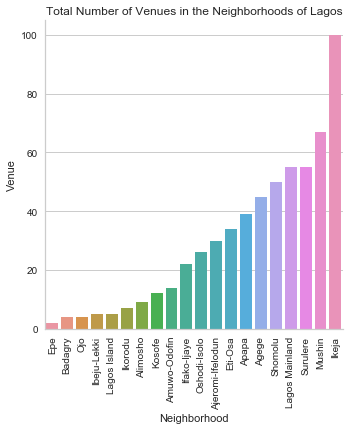

In [39]:
sns.catplot(x="Neighborhood", y="Count", data=top10lag_venues, kind='bar')

plt.xticks(rotation='vertical')
plt.ylabel('Venue')
plt.title('Total Number of Venues in the Neighborhoods of Lagos')
plt.xticks(rotation=90)

plt.savefig("Total Number of Venues in Lagos.png", dpi=300)

plt.show()

We can see that Ikeja has up to 100 venues and Mushin has over 60 venues returned.Surulere, Lagos Mainland, Shomolu and Agege have between 40 and 60 venues. Apapa, Eti-Osa, Ajeromi-Ifelodun, Oshodi-Isolo and Ifako-Ijaye have between 20 and 40 venues. However, from Amowo-Odofin to Epe, the venues returned in our given coordinates are less than 20 in number.

To increase the Neighborhood information, lets process the individual venues. First, let's find out how many unique categories can be curated from all the returned venues

In [40]:
print('There are {} uniques categories.'.format(len(Lagos_venues['Venue Category'].unique())))

There are 102 uniques categories.


# 5. Analyzing each LGA

In [41]:
# one hot encoding
Lagos_onehot = pd.get_dummies(Lagos_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Lagos_onehot['Neighborhood'] = Lagos_venues['Neighborhood'] 

# move neighborhood column to the first column
list_column = Lagos_onehot.columns.tolist()
number_column = int(list_column.index('Neighborhood'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
Lagos_onehot = Lagos_onehot[list_column]

Lagos_onehot.head()

,Neighborhood,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Terminal,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Beach,Beer Garden,Bike Rental / Bike Share,Boat or Ferry,Boutique,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Convention Center,Cupcake Shop,Department Store,Diner,Electronics Store,European Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Court,Fried Chicken Joint,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,History Museum,Hot Dog Joint,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Jewelry Store,Light Rail Station,Liquor Store,Lounge,Market,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Optical Shop,Other Nightlife,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Rental Car Location,Resort,River,Shopping Mall,Soccer Field,Soup Place,Spa,Stadium,Steakhouse,Sushi Restaurant,Theater,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant
0,Agege,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agege,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Agege,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agege,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agege,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### a) Grouping rows by LGA and by taking the mean of the frequency of occurrence of each category

In [42]:
Lagos_grouped = Lagos_onehot.groupby('Neighborhood').mean().reset_index()
Lagos_grouped.head()

,Neighborhood,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Terminal,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Beach,Beer Garden,Bike Rental / Bike Share,Boat or Ferry,Boutique,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Convention Center,Cupcake Shop,Department Store,Diner,Electronics Store,European Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Court,Fried Chicken Joint,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,History Museum,Hot Dog Joint,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Jewelry Store,Light Rail Station,Liquor Store,Lounge,Market,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Optical Shop,Other Nightlife,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Rental Car Location,Resort,River,Shopping Mall,Soccer Field,Soup Place,Spa,Stadium,Steakhouse,Sushi Restaurant,Theater,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant
0,Agege,0.000000,0.0,0.0,0.022222,0.022222,0.000000,0.0,0.0,0.022222,0.0,0.022222,0.0,0.000000,0.022222,0.000000,0.022222,0.000000,0.022222,0.0,0.000000,0.044444,0.0,0.0,0.022222,0.088889,0.0,0.0,0.0,0.022222,0.044444,0.000000,0.0,0.0,0.044444,0.000000,0.0,0.022222,0.0,0.022222,0.0,0.0,0.022222,0.155556,0.0,0.000000,0.000000,0.0,0.022222,0.0,0.0,0.022222,0.000000,0.000000,0.000000,0.022222,0.0,0.0,0.066667,0.0,0.0,0.022222,0.000000,0.000000,0.022222,0.0,0.000000,0.000000,0.022222,0.000000,0.000000,0.0,0.022222,0.0,0.0,0.0,0.000000,0.022222,0.0,0.0,0.000000,0.0,0.022222,0.000000,0.022222,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.022222,0.000000,0.022222,0.0,0.000000,0.0,0.0,0.022222,0.0,0.0,0.0
1,Ajeromi-Ifelodun,0.000000,0.0,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.000000,0.0,0.033333,0.0,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.066667,0.033333,0.0,0.0,0.000000,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.000000,0.100000,0.0,0.033333,0.033333,0.0,0.033333,0.0,0.0,0.000000,0.033333,0.033333,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.000000,0.033333,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.033333,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.033333,0.000000,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.166667,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,Alimosho,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.222222,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,Amuwo-Odofin,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.0,0.071429,0.000000,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.071429,0.0,0.071429,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.071429,0.071429,0.000000,0.0,

### b) Creating a  function to sort the venues in descending order and Adding the result into a new dataframe 

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Lagos_venues_sorted = pd.DataFrame(columns=columns)
Lagos_venues_sorted['Neighborhood'] = Lagos_grouped['Neighborhood']

for ind in np.arange(Lagos_grouped.shape[0]):
   Lagos_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Lagos_grouped.iloc[ind, :], num_top_venues)

Lagos_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Fast Food Restaurant,Bus Station,Hotel,Convenience Store,Boutique,Chinese Restaurant,Heliport,Department Store,Electronics Store,Ice Cream Shop
1,Ajeromi-Ifelodun,Shopping Mall,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Flea Market,Bakery,Multiplex,Clothing Store,Jewelry Store,Indian Restaurant
2,Alimosho,Fast Food Restaurant,Basketball Court,Park,Market,Hotel,Shopping Mall,Pizza Place,Bar,Vegetarian / Vegan Restaurant,Café
3,Amuwo-Odofin,Hotel,African Restaurant,Park,Beach,Bakery,Boat or Ferry,Shopping Mall,Pool,Mobile Phone Shop,Fast Food Restaurant
4,Apapa,Hotel,Shopping Mall,Fast Food Restaurant,Market,Lounge,Pizza Place,Indian Restaurant,Harbor / Marina,Chinese Restaurant,Gym / Fitness Center
5,Badagry,Museum,History Museum,Fast Food Restaurant,Beer Garden,Vegetarian / Vegan Restaurant,Department Store,Campground,Chinese Restaurant,Clothing Store,Coffee Shop
6,Epe,Hotel,Resort,Vegetarian / Vegan Restaurant,Diner,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant
7,Eti-Osa,Hotel,Shopping Mall,Pizza Place,Lounge,Vegetarian / Vegan Restaurant,Flea Market,Ice Cream Shop,Hotel Pool,Gym,Gas Station
8,Ibeju-Lekki,Farm,Business Service,Beach,River,Department Store,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop
9,Ifako-Ijaye,Fast Food Restaurant,Convenience Store,Grocery Store,Bar,Farmers Market,Hotel,Ice Cream Shop,Light Rail Station,Chinese Restaurant,Campground


Let's view the number of categories returned for restaurant.

In [45]:
Lagos_venues_restaurant_only = Lagos_venues[Lagos_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Lagos_venues_restaurant_only.index = np.arange(1, len(Lagos_venues_restaurant_only )+1)

Lets check the number of venues returned for each category

In [46]:
print (Lagos_venues_restaurant_only['Venue Category'].value_counts())

Fast Food Restaurant             66
African Restaurant               16
Chinese Restaurant               13
Indian Restaurant                 4
Portuguese Restaurant             2
Vegetarian / Vegan Restaurant     1
Brazilian Restaurant              1
Comfort Food Restaurant           1
Sushi Restaurant                  1
Asian Restaurant                  1
European Restaurant               1
Name: Venue Category, dtype: int64


In [47]:
print(' Foursquare returned {} venues of restaurants in Lagos.'.format(Lagos_venues_restaurant_only.shape[0]))

 Foursquare returned 107 venues of restaurants in Lagos.


We can see that the highest number was returned for restaurants.The result also indicates the presence of various categories of restaurants. Hence, we will do a more detailed exploration and analysis to get more information about the restaurant in the neighborhood.

# 6. Exploring the Restaurants and Segment them

Let's start from getting the list of unique categories of restaurants in Lagos

In [48]:
Lagos_venues_restaurant_only['Venue Category'].unique()[:100] 

array(['Fast Food Restaurant', 'Chinese Restaurant', 'African Restaurant',
       'European Restaurant', 'Brazilian Restaurant',
       'Portuguese Restaurant', 'Indian Restaurant',
       'Comfort Food Restaurant', 'Asian Restaurant', 'Sushi Restaurant',
       'Vegetarian / Vegan Restaurant'], dtype=object)

In [49]:
print('There are {} unique categories of the restaurants.'.format(len(Lagos_venues_restaurant_only['Venue Category'].unique())))

There are 11 unique categories of the restaurants.


### a) Creating the new dataframe to display the top 10 categories.

In [50]:
top10lag_restaurant = Lagos_venues_restaurant_only['Venue Category'].value_counts()[0:10].to_frame(name='Number of Occurances')
top10lag_restaurant = top10lag_restaurant.reset_index()
top10lag_restaurant.rename(index=str, columns={"index": "VenueCategory", "Number of Occurances": "Number of Occurances"}, inplace=True)
print(top10lag_restaurant.head(10))

                   VenueCategory  Number of Occurances
0           Fast Food Restaurant                    66
1             African Restaurant                    16
2             Chinese Restaurant                    13
3              Indian Restaurant                     4
4          Portuguese Restaurant                     2
5  Vegetarian / Vegan Restaurant                     1
6           Brazilian Restaurant                     1
7        Comfort Food Restaurant                     1
8               Sushi Restaurant                     1
9               Asian Restaurant                     1


In [51]:
Lagos_venues.shape   

(585, 7)

### b) Visualizing data using bar chart

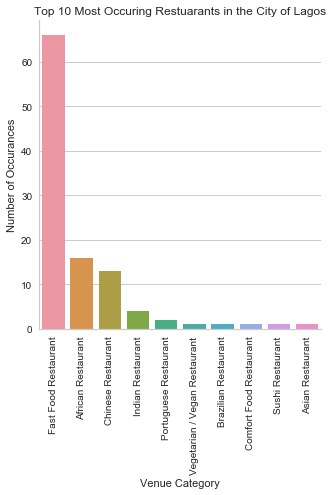

In [52]:
sns.catplot(x="VenueCategory", y = "Number of Occurances", data=top10lag_restaurant, kind='bar')

plt.title('Top 10 Most Occuring Restuarants in the City of Lagos')
plt.xlabel("Venue Category")
plt.ylabel ("Number of Occurances")
plt.xticks(rotation='vertical')

plt.savefig("Top10_Restaurants in Lagos.png", dpi=300)
plt.show()


We can see that Fast Food Restaurant has over 60 venues, followed by African and Chinese Restaurants with over 10 venues. However, for other restaurant categories, the venues returned in our given coordinates are less than 10 in number.


To increase the Neighborhood information, we will process the individual venues. First, let's check the locations of the restaurants.

### c)  Checking the locations of Restaurants at different venues using dataframe

In [53]:
print(Lagos_venues_restaurant_only.shape )
Lagos_venues_restaurant_only.head()

(107, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Agege,6.625256,3.311209,KFC,6.620788,3.317968,Fast Food Restaurant
2,Agege,6.625256,3.311209,Tastee Fried Chicken,6.631432,3.339814,Fast Food Restaurant
3,Agege,6.625256,3.311209,KFC,6.604590,3.308936,Fast Food Restaurant
4,Agege,6.625256,3.311209,Tastee Fried Chicken,6.629090,3.324350,Fast Food Restaurant
5,Agege,6.625256,3.311209,Big Treat,6.634169,3.353467,Chinese Restaurant


### d) Checking the number of restaurant returned for each LGA

In [54]:
Lagos_venues_restaurant = Lagos_venues_restaurant_only.groupby([
                'Neighborhood'])[
                 'Venue Category'].apply(
                  lambda x: x[x.str.contains(
                  'Restaurant')].count())

In [55]:
Lagos_venues_restaurant  

Neighborhood
Agege                9
Ajeromi-Ifelodun     6
Alimosho             2
Amuwo-Odofin         2
Apapa                7
Badagry              1
Eti-Osa              5
Ifako-Ijaye          6
Ikeja               27
Kosofe               3
Lagos Mainland       7
Mushin              10
Ojo                  1
Oshodi-Isolo         5
Shomolu              8
Surulere             8
Name: Venue Category, dtype: int64

In [56]:
Lagos_venues_restaurant_df  = Lagos_venues_restaurant.to_frame().reset_index()
Lagos_venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Lagos_venues_restaurant_df.index = np.arange(1, len(Lagos_venues_restaurant_df)+1)
list_rest_no = Lagos_venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Lagos_venues_restaurant_df['Neighborhood'].to_list()

# 7. Analyzing each Restaurant

In [57]:
# one hot encoding
Lagos_onehot = pd.get_dummies(Lagos_venues_restaurant_only[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Lagos_onehot['Neighborhood'] = Lagos_venues_restaurant_only['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Lagos_onehot.columns[-1]] + list(Lagos_onehot.columns[:-1])
Lagos_onehot = Lagos_onehot[fixed_columns]

Lagos_onehot.head()

,Neighborhood,African Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,European Restaurant,Fast Food Restaurant,Indian Restaurant,Portuguese Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
1,Agege,0,0,0,0,0,0,1,0,0,0,0
2,Agege,0,0,0,0,0,0,1,0,0,0,0
3,Agege,0,0,0,0,0,0,1,0,0,0,0
4,Agege,0,0,0,0,0,0,1,0,0,0,0
5,Agege,0,0,0,1,0,0,0,0,0,0,0


### a) Grouping rows by Restaurants and by taking the mean of the frequency of occurrence of each category¶

In [58]:
Lagos_grouped = Lagos_onehot.groupby('Neighborhood').mean().reset_index()
print(Lagos_grouped.shape)
Lagos_grouped.head()

(16, 12)


,Neighborhood,African Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,European Restaurant,Fast Food Restaurant,Indian Restaurant,Portuguese Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
0,Agege,0.000000,0.0,0.0,0.222222,0.0,0.0,0.777778,0.000000,0.0,0.0,0.0
1,Ajeromi-Ifelodun,0.000000,0.0,0.0,0.333333,0.0,0.0,0.500000,0.166667,0.0,0.0,0.0
2,Alimosho,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
3,Amuwo-Odofin,0.500000,0.0,0.0,0.000000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0
4,Apapa,0.142857,0.0,0.0,0.142857,0.0,0.0,0.428571,0.285714,0.0,0.0,0.0


### b) Printing the neighbourhoods with their respective top 10 most common venues.

In [59]:
num_top_venues = 10

for hood in Lagos_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Lagos_grouped[Lagos_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agege----
                     venue  freq
0     Fast Food Restaurant  0.78
1       Chinese Restaurant  0.22
2       African Restaurant  0.00
3         Asian Restaurant  0.00
4     Brazilian Restaurant  0.00
5  Comfort Food Restaurant  0.00
6      European Restaurant  0.00
7        Indian Restaurant  0.00
8    Portuguese Restaurant  0.00
9         Sushi Restaurant  0.00


----Ajeromi-Ifelodun----
                     venue  freq
0     Fast Food Restaurant  0.50
1       Chinese Restaurant  0.33
2        Indian Restaurant  0.17
3       African Restaurant  0.00
4         Asian Restaurant  0.00
5     Brazilian Restaurant  0.00
6  Comfort Food Restaurant  0.00
7      European Restaurant  0.00
8    Portuguese Restaurant  0.00
9         Sushi Restaurant  0.00


----Alimosho----
                     venue  freq
0     Fast Food Restaurant   1.0
1       African Restaurant   0.0
2         Asian Restaurant   0.0
3     Brazilian Restaurant   0.0
4       Chinese Restaurant   0.0
5  Comfort Food 

### c) Creating a function to sort the venues in descending order and Adding the result into a new dataframe

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Lagos_grouped['Neighborhood']

for ind in np.arange(Lagos_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Lagos_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,Ajeromi-Ifelodun,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
2,Alimosho,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
3,Amuwo-Odofin,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
4,Apapa,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant


### d) Clustering the neighbourhoods using k-means and Merging dataframes

First, let's find the best K using the Elbow Point method.

In [62]:
#from sklearn.cluster import KMeans

In [63]:
Lagos_grouped_clustering = Lagos_grouped.drop('Neighborhood', 1)
sum_of_squared_distances = []
K = range(1,11)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(Lagos_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

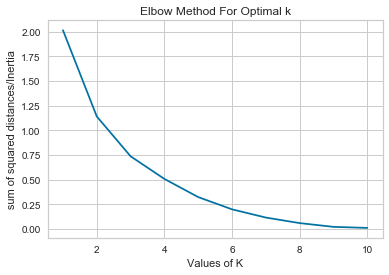

In [64]:
plt.plot(K,sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

From the above visualization, we can see that the optimal number of clusters should be around 4.

To verify above result, we will run the clustering model and visualizer.

In [65]:
#from yellowbrick.cluster import KElbowVisualizer

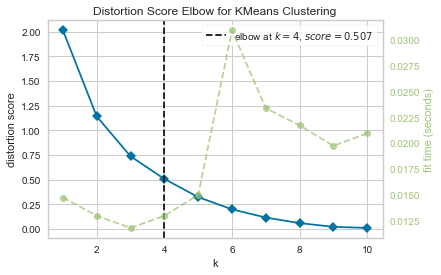

In [66]:
# runnning the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
 
# Fitting the data to the visualizer
visualizer.fit(Lagos_grouped_clustering) 

plt.savefig("K-Means Elbow Model.png", dpi=300)
visualizer.show()

#### Since the optimum K value is 4, we will set number of clusters at 4.

In [67]:
# set number of clusters 
kclusters = 4

Lagos_grouped_clustering = Lagos_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Lagos_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 2, 0, 3, 2, 1, 2, 3, 3])

In [68]:
Lagos_merged = Lagos_df
Lagos_merged.head()

,LGA,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude
0,Agege,11,459939,Agege,100,6.625256,3.311209
1,Alimosho,185,1277714,Ikotun,100,6.584343,3.257631
2,Ifako-Ijaye,27,427878,Ifako,100,6.660436,3.321539
3,Ikeja,46,313196,Ikeja,100,6.604859,3.353204
4,Kosofe,81,665393,Kosofe,100,6.581974,3.414836


In [69]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,Ajeromi-Ifelodun,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
2,Alimosho,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
3,Amuwo-Odofin,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
4,Apapa,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant


In [70]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
neighborhoods_venues_sorted_w_clusters.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,Ajeromi-Ifelodun,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
2,Alimosho,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
3,Amuwo-Odofin,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
4,Apapa,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant


Now, lets add clustering labels to the dataframe.

In [71]:
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted_w_clusters.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Agege,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,3,Ajeromi-Ifelodun,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
2,2,Alimosho,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
3,0,Amuwo-Odofin,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
4,3,Apapa,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant


Joining the dataframes

In [72]:
Lagos_merged.rename(columns={'LGA':'Neighborhood'}, inplace=True)

Lagos_merged = Lagos_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [73]:
Lagos_merged.head()

,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,11,459939,Agege,100,6.625256,3.311209,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,Alimosho,185,1277714,Ikotun,100,6.584343,3.257631,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
2,Ifako-Ijaye,27,427878,Ifako,100,6.660436,3.321539,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
3,Ikeja,46,313196,Ikeja,100,6.604859,3.353204,3.0,Fast Food Restaurant,African Restaurant,Chinese Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Comfort Food Restaurant
4,Kosofe,81,665393,Kosofe,100,6.581974,3.414836,3.0,Portuguese Restaurant,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant


In [74]:
Lagos_merged

,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,11,459939,Agege,100,6.625256,3.311209,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,Alimosho,185,1277714,Ikotun,100,6.584343,3.257631,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
2,Ifako-Ijaye,27,427878,Ifako,100,6.660436,3.321539,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
3,Ikeja,46,313196,Ikeja,100,6.604859,3.353204,3.0,Fast Food Restaurant,African Restaurant,Chinese Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Comfort Food Restaurant
4,Kosofe,81,665393,Kosofe,100,6.581974,3.414836,3.0,Portuguese Restaurant,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
5,Mushin,17,633009,Mushin,100,6.533331,3.349999,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100,6.540010,3.312415,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
7,Shomolu,12,402673,Shomolu,101,6.533565,3.384161,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
9,Apapa,27,217362,Apapa,101,6.445187,3.368373,3.0,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant
10,Eti-Osa,192,287785,Ikoyi,101,6.460231,3.532181,1.0,Vegetarian / Vegan Restaurant,Sushi Restaurant,Comfort Food Restaurant,Chinese Restaurant,Asian Restaurant,Portuguese Restaurant,Indian Restaurant,Fast Food Restaurant,European Restaurant,Brazilian Restaurant


Removing NaN value from the table

In [75]:
Lagos_merged.drop([11, 20,22, 23], inplace = True)

In [76]:
Lagos_merged.tail()

,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Surulere,23,503975,Surulere,101,6.487201,3.353259,0.0,Fast Food Restaurant,African Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant
15,Ajeromi-Ifelodun,12,684105,Ajeromi/Ifelodun,102,6.455122,3.335946,3.0,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
16,Amuwo-Odofin,135,318166,Festac Town,102,6.447023,3.266280,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
17,Ojo,158,598071,Ojo,102,6.466665,3.183333,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
18,Badagry,441,241093,Badagry,103,6.439322,2.905844,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant


### d) Visualizing the resulting clusters using bar chart

Check how many neighborhoods in each cluster

In [77]:
Lagos_merged['Cluster Labels'].value_counts()

2.0    6
0.0    5
3.0    4
1.0    1
Name: Cluster Labels, dtype: int64

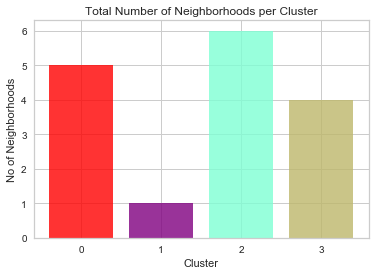

In [78]:
x = (0, 1, 2,3)
y_pos = np.arange(len(x))
performance = Lagos_merged['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, x)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Total Number of Neighborhoods per Cluster')

plt.show()

Let's view the locations of the clusters

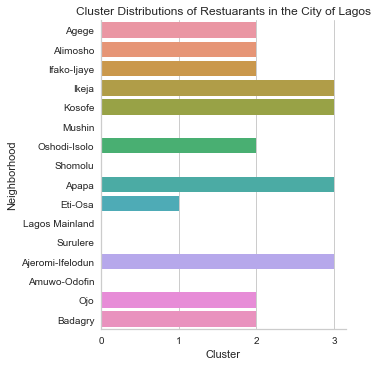

In [79]:
x = ( 0, 1, 2,3)
y_pos = np.arange(len(x)) 
sns.catplot(x='Cluster Labels', y='Neighborhood', data=Lagos_merged, kind='bar', );
plt.xticks(y_pos, x)
plt.title('Cluster Distributions of Restuarants in the City of Lagos')
plt.xlabel("Cluster")
plt.ylabel ("Neighborhood")


plt.savefig("Restuarants Cluster in Lagos.png", dpi=500)
plt.show()


Here, we can see that cluster 0 is mainly distributed around Mushin, Shomolu, Lagos Mainland, Surulere and Amuwo-Odofin. Cluster 1 is located at Eti-Osa. Cluster 2, on the other hand is found within Agege, Alimosho, Ifako-Ijaye, Oshodi-Isolo, Ojo and Badagry. Meanwhile, clusters 4 is distributed in Ikeja, Kosofe, Apapa and Ajeromi-Ifelodun. With this result, we can now view the map distribution.

### e) Visualizing the resulting clusters on a map

In [80]:
# create a map with folium
top10restaurants_map_clusters = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>", zoom_start=11)

# set color scheme for the four clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Lagos_merged['Latitude'], 
                                  Lagos_merged['Longitude'], 
                                  Lagos_merged['Neighborhood'], 
                                  Lagos_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(top10restaurants_map_clusters)
        
top10restaurants_map_clusters 

# 8.  Examining the clusters

Let's examine each cluster and venue categories ocuupying the cluster. 


### a) First Cluster: Cluster 0

In [81]:
first_cluster = Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 0]
first_cluster

,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Mushin,17,633009,Mushin,100,6.533331,3.349999,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
7,Shomolu,12,402673,Shomolu,101,6.533565,3.384161,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
12,Lagos Mainland,19,317720,Lagos Mainland,101,6.493061,3.388250,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
13,Surulere,23,503975,Surulere,101,6.487201,3.353259,0.0,Fast Food Restaurant,African Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant
16,Amuwo-Odofin,135,318166,Festac Town,102,6.447023,3.266280,0.0,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant


### b) Second Cluster:  Cluster 1

In [82]:
second_cluster =Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 1]
second_cluster 

,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Eti-Osa,192,287785,Ikoyi,101,6.460231,3.532181,1.0,Vegetarian / Vegan Restaurant,Sushi Restaurant,Comfort Food Restaurant,Chinese Restaurant,Asian Restaurant,Portuguese Restaurant,Indian Restaurant,Fast Food Restaurant,European Restaurant,Brazilian Restaurant


### c) Third Cluster: Cluster 2

In [83]:
third_cluster  = Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 2]
third_cluster 


,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,11,459939,Agege,100,6.625256,3.311209,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
1,Alimosho,185,1277714,Ikotun,100,6.584343,3.257631,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
2,Ifako-Ijaye,27,427878,Ifako,100,6.660436,3.321539,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
6,Oshodi-Isolo,45,621509,Oshodi/Isolo,100,6.540010,3.312415,2.0,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant
17,Ojo,158,598071,Ojo,102,6.466665,3.183333,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant
18,Badagry,441,241093,Badagry,103,6.439322,2.905844,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant,Asian Restaurant


### d) Fourth Cluster: Cluster 3

In [84]:
fourth_cluster = Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 3]
fourth_cluster 


,Neighborhood,Area (km2),Population,Administrative Capital,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ikeja,46,313196,Ikeja,100,6.604859,3.353204,3.0,Fast Food Restaurant,African Restaurant,Chinese Restaurant,Portuguese Restaurant,Indian Restaurant,European Restaurant,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Comfort Food Restaurant
4,Kosofe,81,665393,Kosofe,100,6.581974,3.414836,3.0,Portuguese Restaurant,Fast Food Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Indian Restaurant,European Restaurant,Comfort Food Restaurant,Chinese Restaurant,Brazilian Restaurant
9,Apapa,27,217362,Apapa,101,6.445187,3.368373,3.0,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant
15,Ajeromi-Ifelodun,12,684105,Ajeromi/Ifelodun,102,6.455122,3.335946,3.0,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Portuguese Restaurant,European Restaurant,Comfort Food Restaurant,Brazilian Restaurant,Asian Restaurant


# 9. Summary

The Fast Food Restaurants appeared as the 1st most common restaurant category in the first, third and fourth clusters. This is not surprising as the city has a vast number of Fast Food restaurants. However, the second cluster is occupied by the Vegetarian/Vegan Restaurant. 

The 2nd most common venues are topped by different restaurants among the clusters. Hence, considering the Fast Food Restaurant which is undoubtedly very common in the areas, the clusters can be described as follows:

The first cluster (Cluster 0): This is the Fast Food-African cluster. Here, visitors/ tourists who want to have a taste of different African dishes can easily locate the African Restaurant at Mushin, Shomolu, Lagos Mainland, Surulere, and Amuwo-Odofin areas.

The second cluster (Cluster 1): Here, the Vegetarian/ Vegan Restauran is the first most common venue, followed by Sushi. It can be called the Vegetarian/ Vegan-Sushi cluster located at Eti-Osa.

The third cluster (Cluster 2): This cluster can be named the Fast Food-Chinese-Vegetarian/ Vegan cluster. Tourists can easily get Chinese Restaurant at Agege, Ifako, and Oshodi-Isolo. Vegetarian/ Vegan restaurants are highly distributed around Alimosho, Ojo and Badagry.

The fourth cluster (Cluster 3): This cluster has a variety of restaurants. It can be known as the Fast Food-Portuguese/Afro-Asian cluster. Portuguese Restaurant is easily located at Kosofe. African, Indian and Chinese Restaurant are mainly distributed at Ikeja, Kosofe, Apapa and Ajeromi-Ifelodun.

# Thank You!